We Import needed libraries and methods.

In [326]:
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, gaussian_kde

We load the files with p values calculated for shuffled real world data with no differences between the groups.

In [327]:
real_world_p_values_pool_list = []

for file in os.listdir('data/p_values_real_world/'):
    real_world_p_values_from_file = np.loadtxt(f'data/p_values_real_world/{file}', delimiter='\t')
    real_world_p_values_pool_list.append(real_world_p_values_from_file)

real_world_p_values_pool = np.column_stack(real_world_p_values_pool_list) 

In [328]:
real_world_adjusted_p_values_pool_list = []

for file in os.listdir('data/adjusted_p_values_real_world/'):
    real_world_adjusted_p_values_from_file = np.loadtxt(f'data/adjusted_p_values_real_world/{file}', delimiter='\t')
    real_world_adjusted_p_values_pool_list.append(real_world_adjusted_p_values_from_file)

real_world_adjusted_p_values_pool = np.column_stack(real_world_adjusted_p_values_pool_list) 

We find significant p values for each dataset.

In [329]:
def plot_histogram_and_binomial_basic(alpha, real_world_p_values_pool, bins, color='skyblue'):
    real_world_p_values_pool_binary = real_world_p_values_pool < alpha
    number_of_trues_real_world_p_values_pool_binary  = np.sum(real_world_p_values_pool_binary, axis=0)
    
    n = real_world_p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_real_world_p_values_pool_binary) / n
    
    counts, bin_edges = np.histogram(number_of_trues_real_world_p_values_pool_binary, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, linestyle='--', color=color, label=f'Empirical histogram for alpha={alpha}')
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p}')

In [365]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

def plot_histogram_and_binomial(alpha, p_values_pool, bins, color='skyblue', window_size=20):
    p_values_pool_binary = p_values_pool < alpha
    number_of_trues_p_values_pool_binary = np.sum(p_values_pool_binary, axis=0)
    
    n = p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_p_values_pool_binary) / n
    
    bin_edges = np.linspace(0, 10000, bins)  # bins between 0 and 10000
    counts, _ = np.histogram(number_of_trues_p_values_pool_binary, bins=bin_edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Smooth the histogram counts using a moving average
    smoothed_counts = moving_average(counts, window_size)
    #I add (0,0) to bin_centers and smoothed_counts for better plotting and log scaling
    bin_centers = np.insert(bin_centers, 0, 0)
    smoothed_counts = np.insert(smoothed_counts, 0, 0)
    plt.plot(bin_centers, smoothed_counts, linestyle='--', color=color, label=f'Smoothed empirical histogram for alpha={alpha}')
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p}')


We plot the histogram of number of significant findings in independent p values pool along with binomial distribution.

In [489]:
def plot_histogram_and_binomial_with_bars(alpha, p_values_pool, bins, color='skyblue'):
    p_values_pool_binary = p_values_pool < alpha
    number_of_trues_p_values_pool_binary = np.sum(p_values_pool_binary, axis=0)
    n = p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_p_values_pool_binary) / n
    
    min_value = 0 if number_of_trues_p_values_pool_binary.min() == 0 else np.log10(number_of_trues_p_values_pool_binary.min())
    bin_edges = np.logspace(min_value, np.log10(max(number_of_trues_p_values_pool_binary)), bins)
    plt.hist(number_of_trues_p_values_pool_binary, bins=bin_edges, alpha=0.6, color=color)
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p}')

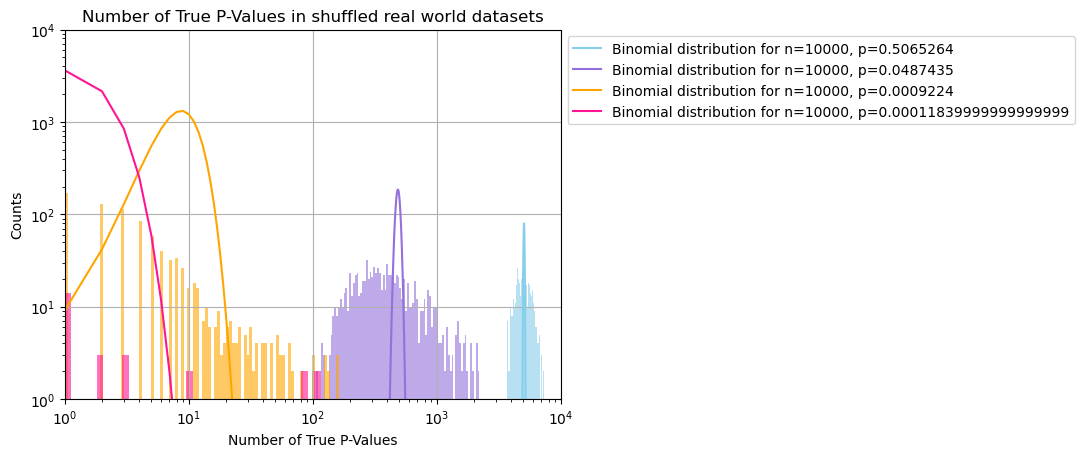

In [490]:
plot_histogram_and_binomial_with_bars(0.5, real_world_p_values_pool, 100, color='skyblue')
plot_histogram_and_binomial_with_bars(0.05, real_world_p_values_pool, 100, color='mediumpurple')
plot_histogram_and_binomial_with_bars(0.001, real_world_p_values_pool, 100, color='orange')
#plot_histogram_and_binomial_with_bars(0.00005, real_world_p_values_pool, 1000, color='mediumseagreen')
plot_histogram_and_binomial_with_bars(0.05, real_world_adjusted_p_values_pool, 50, color='deeppink')
plt.xlabel('Number of True P-Values')
plt.ylabel('Counts')
plt.title('Number of True P-Values in shuffled real world datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 10000)
plt.ylim(1, 10000)
plt.show()